In [ ]:
!pip install transformers==4.30.2

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
import numpy as np

In [ ]:
raw_dataset=load_dataset('glue','sst2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


**'glue':**<br><br>

- This is the name of the dataset group. GLUE (General Language Understanding Evaluation) is a benchmark for evaluating the performance of models across various NLP tasks.<br><br>



**'sst2':**

- This is the name of a specific dataset within the GLUE benchmark. The SST-2 dataset (Stanford Sentiment Treebank) is a collection of movie reviews from Rotten Tomatoes, labeled with sentiment (positive or negative).<br><br>


So, when we call load_dataset('glue', 'sst2'), it fetches the SST-2 dataset from the GLUE benchmark. This dataset can then be used for tasks such as sentiment analysis or fine-tuning pre-trained language models

In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [ ]:
raw_dataset['train']

Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 67349
})

In [ ]:
dir(raw_dataset['train'])

['_TF_DATASET_REFS',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getitems__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_local_temp_path',
 '_check_index_is_initialized',
 '_data',
 '_estimate_nbytes',
 '_fingerprint',
 '_format_columns',
 '_format_kwargs',
 '_format_type',
 '_generate_tables_from_cache_file',
 '_generate_tables_from_shards',
 '_get_cache_file_path',
 '_get_output_signature',
 '_getitem',
 '_indexes',
 '_indices',
 '_info',
 '_map_single',
 '_new_dataset_with_indices',
 '_output_all_columns',
 '_push_parquet_shards_to_hub',
 '_save_to_disk_single',
 '_select_contiguous',
 '_select_wi

- Calling dir(raw_dataset['train']) will return a list of attributes and methods available for the object corresponding to the training subset of the dataset loaded from the SST-2 dataset.

In [ ]:
type(raw_dataset['train'])

datasets.arrow_dataset.Dataset

- raw_dataset['train'] object belongs to the datasets library's arrow_dataset module, specifically the Dataset class within it.

In [ ]:
raw_dataset['train'].data

MemoryMappedTable
sentence: string
label: int64
idx: int32
----
sentence: [["hide new secretions from the parental units ","contains no wit , only labored gags ","that loves its characters and communicates something rather beautiful about human nature ","remains utterly satisfied to remain the same throughout ","on the worst revenge-of-the-nerds clichés the filmmakers could dredge up ",...,"you wish you were at home watching that movie instead of in the theater watching this one ","'s no point in extracting the bare bones of byatt 's plot for purposes of bland hollywood romance ","underdeveloped ","the jokes are flat ","a heartening tale of small victories "],["suspense , intriguing characters and bizarre bank robberies , ","a gritty police thriller with all the dysfunctional family dynamics one could wish for ","with a wonderful ensemble cast of characters that bring the routine day to day struggles of the working class to life ","nonetheless appreciates the art and reveals a music sc

In [ ]:
raw_dataset['train'][0]

{'sentence': 'hide new secretions from the parental units ',
 'label': 0,
 'idx': 0}

In [ ]:
raw_dataset['train'].features['label'].int2str(1)

'positive'

In [ ]:
raw_dataset['train'].features['label'].int2str(0)

'negative'

In [ ]:
from transformers import AutoTokenizer

In [ ]:
model='distilbert-base-uncased'
tokenizer=AutoTokenizer.from_pretrained(model)

- The model distilbert-base-uncased refers to a version of the DistilBERT model, which is a distilled and smaller version of the original BERT model. Here's what you can infer about its capabilities:<br><br>

**DistilBERT:**

- DistilBERT is a transformer-based model developed by Hugging Face. It is trained to understand the context of words in a sentence and can be fine-tuned for various natural language processing (NLP) tasks.<br><br>


**Base:**

- The term "base" typically refers to the size of the model. In this case, it suggests that distilbert-base-uncased is one of the base-sized variants of the DistilBERT model. Base-sized models are smaller and faster compared to larger variants like "large" or "huge," but they might sacrifice some performance on certain tasks.<br><br>


**Uncased:**

- The "uncased" suffix indicates that the model is trained on lowercased text. This means that during both pre-training and fine-tuning, the model treats all text as lowercase. This simplifies the model's learning process, especially for languages like English where case may not always be semantically significant.

In [ ]:
tokenized_sent=tokenizer(raw_dataset['train'][0:3]['sentence'])
from pprint import pprint
print(tokenized_sent)

{'input_ids': [[101, 5342, 2047, 3595, 8496, 2013, 1996, 18643, 3197, 102], [101, 3397, 2053, 15966, 1010, 2069, 4450, 2098, 18201, 2015, 102], [101, 2008, 7459, 2049, 3494, 1998, 10639, 2015, 2242, 2738, 3376, 2055, 2529, 3267, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
def tokenized_fn(batch):
  return tokenizer(batch['sentence'],truncation=True)

- This function takes a batch of sentences, tokenizes them using the specified tokenizer, and returns the tokenized representations, potentially with truncation applied to ensure uniform sequence lengths within the batch.

- BERT and DistilBERT models often have a maximum sequence length of 512 tokens.

- When truncating sequences, it's common to choose a maximum length that balances computational resources with the need to preserve important information in the text. Choosing a length that is too short may result in loss of information, while choosing a length that is too long may lead to increased computational overhead.

In [ ]:
tokenized_datasets=raw_dataset.map(tokenized_fn,batched=True)

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments

In [ ]:
# from transformers import TrainingArguments

# # Define training arguments
# training_args = TrainingArguments(
#     output_dir='./results',           # Output directory
#     num_train_epochs=3,               # Number of training epochs
#     per_device_train_batch_size=8,    # Batch size per device during training
#     per_device_eval_batch_size=8,     # Batch size per device during evaluation
#     logging_dir='./logs',             # Directory for storing logs
#     logging_steps=100,                # Log every 100 steps
#     save_steps=500,                   # Save checkpoint every 500 steps
#     evaluation_strategy='epoch',      # Evaluate at the end of each epoch
#     save_total_limit=2,               # Limit the total number of checkpoints
#     load_best_model_at_end=True,      # Load the best model from checkpoint at the end of training
#     metric_for_best_model='accuracy', # Metric to use for saving the best model
#     greater_is_better=True            # Whether the 'metric_for_best_model' should be maximized
# )

**output_dir:**

- This parameter specifies the directory where the model checkpoints and training results will be saved. For example, output_dir='./results' means that all output files will be stored in the results directory.<br><br>


**Model Checkpoints:**

- Model checkpoints are snapshots of a neural network model's state at certain points during training. These snapshots include the model's architecture as well as the values of its parameters (weights and biases). Checkpoints are typically saved periodically during training to disk, allowing the training process to be resumed from the point at which the checkpoint was saved.<br><br>

Checkpoints serve several important purposes:

**Resuming Training:** <br><br>

If training is interrupted (e.g., due to a system crash or manual termination), checkpoints allow training to be resumed from the most recent saved point, rather than starting from scratch.<br><br>

**Evaluation and Inference:**

Checkpoints can be loaded for evaluation on a validation or test set, or for making predictions on new data.<br><br>


**Model Selection:**

Checkpoints can be used to select the best-performing model based on evaluation metrics on a validation set.<br><br>


**Training Results:**

Training results refer to various information and metrics collected during the training process. These results provide insights into the performance and behavior of the model as it learns from the training data. Common training results include:

**Loss Values:**

The loss function measures how well the model's predictions match the true labels during training. Monitoring the loss values over time helps assess the model's learning progress.


**Metrics:**

Metrics such as accuracy, precision, recall, F1-score, etc., are often computed on a validation set during training to evaluate the model's performance. These metrics provide feedback on how well the model generalizes to unseen data.


**Learning Curves:**

Learning curves visualize the training and validation metrics (e.g., loss, accuracy) over epochs or training steps. They help diagnose issues such as overfitting or underfitting and assess the model's convergence.


**Logs:**

Logs contain additional information about the training process, such as training time, memory usage, and any warnings or errors encountered.

**num_train_epochs:**

This parameter determines the number of training epochs, indicating how many times the model will be trained on the entire training dataset. For example, num_train_epochs=3 means the model will be trained for 3 epochs.

**per_device_train_batch_size:**

This parameter sets the batch size per device (e.g., GPU or CPU) during training. For example, per_device_train_batch_size=8 means that 8 samples will be processed in parallel on each device during training.

**per_device_eval_batch_size:**

Similar to per_device_train_batch_size, this parameter sets the batch size per device during evaluation. For example, per_device_eval_batch_size=8 means that 8 samples will be processed in parallel on each device during evaluation.

**logging_dir:**

This parameter specifies the directory where training logs will be stored. For example, logging_dir='./logs' means that logs will be saved in the logs directory.

**logging_steps:**

This parameter determines how often training metrics will be logged, specified as the number of training steps between each log entry. For example, logging_steps=100 means that training metrics will be logged every 100 steps.

**save_steps:**

This parameter sets the frequency of saving model checkpoints during training, specified as the number of training steps. For example, save_steps=500 means that a checkpoint will be saved every 500 steps.

**evaluation_strategy:**


This parameter determines when evaluation is performed during training, either at the end of each epoch ('epoch') or at specified intervals of training steps ('steps'). For example, evaluation_strategy='epoch' means that evaluation will be performed at the end of each epoch.<br><br>


- evaluation_strategy='epoch' specifies that the model should be evaluated at the end of each training epoch (num_train_epochs=3).<br><br>


- After each epoch (full pass through the training dataset), the trainer will automatically evaluate the model on the evaluation dataset (eval_dataset) and compute evaluation metrics (e.g., accuracy, loss).<br><br>


- This strategy is useful for monitoring the model's performance over training epochs and detecting any overfitting or underfitting trends.

**save_total_limit:**

This parameter sets a limit on the total number of checkpoints to keep. For example, save_total_limit=2 means that only the two most recent checkpoints will be saved, preventing excessive disk usage.

**load_best_model_at_end:**

This parameter specifies whether the best model checkpoint based on the evaluation metric should be loaded at the end of training. For example, load_best_model_at_end=True means that the best model will be loaded.

**metric_for_best_model:**

This parameter determines the evaluation metric used for selecting the best model checkpoint. For example, metric_for_best_model='accuracy' means that the model with the highest accuracy on the validation set will be selected as the best model.

**greater_is_better:**


This parameter indicates whether a higher value of the evaluation metric is considered better for selecting the best model checkpoint. For example, greater_is_better=True means that higher accuracy values are preferred

**Accelerate:**<br><br>

- Suppose you're training a deep learning model to recognize images. This process involves lots of complex calculations.<br><br>
- With accelerate, you can harness the power of specialized hardware like GPUs (Graphics Processing Units) to speed up these calculations.<br><br>
- For example, if it takes 10 hours to train your model on a regular computer, accelerate might reduce it to just 2 hours on a GPU.<br><br>
- Similarly, when you're running your trained model to make predictions, accelerate helps make those predictions faster, which is crucial for real-time applications like video processing or natural language understanding.<br><br>
In summary, bitsandbytes helps with data compression and decompression, while accelerate boosts the performance of deep learning tasks by leveraging specialized hardware.

In [ ]:
from transformers import Trainer, TrainingArguments

In [ ]:
!pip install accelerate==0.21.0

In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.21.0
    Uninstalling accelerate-0.21.0:
      Successfully uninstalled accelerate-0.21.0


In [ ]:
!pip show transformers accelerate


Name: transformers
Version: 4.30.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 
---
Name: accelerate
Version: 0.21.0
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: sylvain@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, packaging, psutil, pyyaml, torch
Required-by: 


In [ ]:
training_args=TrainingArguments(
    'my_trainer',                          #  Output directory where checkpoints and logs will be saved
    evaluation_strategy='epoch',           # Evaluate model at the end of each epoch
    save_strategy='epoch',                  # Save model checkpoint at the end of each epoch
    num_train_epochs=1,                     # Save model checkpoint at the end of each epoch




)

In [ ]:
from transformers import AutoModelForSequenceClassification

**Automatic Model Selection:**

- The AutoModelForSequenceClassification class automatically selects the appropriate pre-trained model for sequence classification tasks. Sequence classification tasks involve classifying sequences of tokens (such as sentences or documents) into one or more predefined categories.

In [ ]:
checkpoint = "bert-base-uncased"

In [ ]:
model=AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=2
)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**pretrained_model_name_or_path:**

This parameter specifies the identifier or path of the pre-trained model to load. It can be the name of a model available in the Hugging Face model hub (e.g., "bert-base-uncased") or the path to a directory containing a pre-trained model checkpoint.


**num_labels:**


This parameter specifies the number of labels or classes in the classification task. For sequence classification tasks, the model's final layer typically has num_labels output units corresponding to the number of classes.


**config:**


This parameter allows you to pass a model configuration object (PretrainedConfig) to the model. It can be used to customize the model's architecture and behavior.<br><br>






**state_dict:**


This parameter allows you to directly initialize the model's parameters (weights and biases) from a PyTorch state_dict. It can be useful for loading custom or modified model weights.
cache_dir: This parameter specifies the directory where downloaded model weights will be cached. If not provided, a default cache directory will be used.


state_dict Parameter:<br><br>
- The state_dict parameter allows you to initialize a model's parameters (weights and biases) directly from a PyTorch state_dict. This is useful when you want to load custom or modified model weights into a pretrained model architecture.


        import torch
        from transformers import BertModel, BertTokenizer

        # Instantiate a pretrained BERT model
        model_name = "bert-base-uncased"
        model = BertModel.from_pretrained(model_name)

        # Suppose you have a custom state_dict with modified weights
        custom_state_dict = torch.load("custom_bert_state_dict.pth")

        # Load the custom state_dict into the model
        model.load_state_dict(custom_state_dict)

        # Now `model` has been initialized with the custom weights from `custom_state_dict`


cache_dir Parameter:<br><br>

- The cache_dir parameter specifies the directory where downloaded model weights will be cached. If this parameter is not provided, a default cache directory will be used to store and retrieve pretrained model weights.


      from transformers import BertTokenizer

      # Specify a custom cache directory for model weights
      custom_cache_dir = "my_model_cache"

      # Instantiate a BERT tokenizer with a custom cache directory
      tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", cache_dir=custom_cache_dir)

      # Now the model weights downloaded by the tokenizer will be cached in `my_model_cache`


**from_tf:**


This parameter specifies whether to load the model weights from a TensorFlow checkpoint if available. By default, it's set to False.<br><br>


      from transformers import BertModel

      # Example: Load a BERT model pretrained using TensorFlow into a PyTorch model
      model_name_tf = "bert-base-uncased-tf"

      # Instantiate a PyTorch model using the TensorFlow checkpoint
      model = BertModel.from_pretrained(model_name_tf, from_tf=True)

      # Now `model` is initialized with the model weights loaded from a TensorFlow checkpoint


**force_download:** <br><br>

This parameter specifies whether to force re-download of model weights, even if they already exist in the cache directory. By default, it's set to False.




**resume_download:**


This parameter specifies whether to resume interrupted downloads of model weights. By default, it's set to False.
local_files_only: This parameter specifies whether to only load model weights from local files and skip downloading from remote sources. By default, it's set to False.

In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
type(model)

transformers.models.bert.modeling_bert.BertForSequenceClassification

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
BertForSequenceClassification                           --
├─BertModel: 1-1                                        --
│    └─BertEmbeddings: 2-1                              --
│    │    └─Embedding: 3-1                              23,440,896
│    │    └─Embedding: 3-2                              393,216
│    │    └─Embedding: 3-3                              1,536
│    │    └─LayerNorm: 3-4                              1,536
│    │    └─Dropout: 3-5                                --
│    └─BertEncoder: 2-2                                 --
│    │    └─ModuleList: 3-6                             85,054,464
│    └─BertPooler: 2-3                                  --
│    │    └─Linear: 3-7                                 590,592
│    │    └─Tanh: 3-8                                   --
├─Dropout: 1-2                                          --
├─Linear: 1-3                                           1,538
Total params: 10

  **Input Embeddings:**<br><br>
  The input to the model consists of sequences of tokens (words or subwords) from the input text.
        Each token is converted into a vector representation using an embedding layer.
        
  There are three types of embeddings:


        Word Embeddings:
        
        Each token is mapped to a vector representation using a pre-trained embedding matrix. This captures the meaning of individual words.


        Position Embeddings:
        
        Each token is assigned a position embedding vector, indicating its position in the sequence. This helps the model understand the order of tokens in the input.

        Token Type Embeddings:
        
        For tasks involving multiple sequences (e.g., question answering), each sequence is assigned a token type embedding to distinguish between them.


        Encoder Layers:
        The model consists of multiple layers of transformer blocks, called
        BertLayers.


        Each BertLayer contains two main components:

        Self-Attention Mechanism:
        
        This mechanism allows the model to weigh the importance of each token in the sequence based on its relevance to other tokens. It attends to different parts of the input sequence when generating representations.
        Feedforward Neural Networks: After attending to relevant parts of the input sequence, the model passes the attended representations through feedforward neural networks to capture complex patterns and relationships in the data.


        Pooling Layer:


        After processing all the tokens in the sequence through the encoder layers, the model applies a pooling mechanism to aggregate the token-level representations into a single representation for the entire sequence.
        In this case, the pooling mechanism uses a fully connected layer followed by a non-linear activation function (Tanh) to compute the pooled representation.


        Output Layer:

        The pooled representation is passed through a linear layer (classifier) to produce the final output.
        For sequence classification tasks, such as sentiment analysis or text categorization, the output layer has two units (out_features=2), representing the probabilities of belonging to each class (e.g., positive or negative sentiment).


        Dropout:

        
        Dropout is applied throughout the model to prevent overfitting by randomly setting a fraction of input units to zero during training. This helps the model generalize better to unseen data.

In [ ]:
params_before=[]
for name,p in model.named_parameters():
  params_before.append(p.detach().cpu().numpy())

- After executing this code, params_before will contain the numpy representations of all the model parameters. These representations can be used for various purposes such as comparison, visualization, or tracking parameter changes during training.

In [ ]:
from transformers import Trainer

In [ ]:
from datasets import load_metric

In [ ]:
metric=load_metric('glue','sst2')

<ipython-input-36-70c9b2e53933>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric=load_metric('glue','sst2')
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for glue contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/glue/glue.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
metric.compute(predictions=[1,0,1],references=[1,0,0])

{'accuracy': 0.6666666666666666}

In [ ]:
def compute_metrics(logits_and_labels):
  logits,labels=logits_and_labels
  predictions=np.argmax(logits,axis=1)
  return metric.compute(predictions=predictions,references=labels)

In [ ]:
trainer=Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.212600,0.360417,0.907110


TrainOutput(global_step=8419, training_loss=0.2888136008584679, metrics={'train_runtime': 774.6423, 'train_samples_per_second': 86.942, 'train_steps_per_second': 10.868, 'total_flos': 1027304268433620.0, 'train_loss': 0.2888136008584679, 'epoch': 1.0})

**global_step:**



- This represents the total number of optimization steps (parameter updates) performed during training. Each optimization step corresponds to one batch of training data processed.



**training_loss:**



- This is the average loss value computed during the training process. It represents how well the model's predictions match the ground truth labels on the training data. Lower values indicate better performance.



**metrics:**



- This dictionary contains additional metrics and information related to the training process. Let's break down each metric:


- **train_runtime:**


- This is the total runtime of the training process in seconds. It represents the amount of time taken to complete the training.


- **train_samples_per_second:**


- This metric indicates the number of training samples processed per second. It represents the training speed or throughput of the model.


- **train_steps_per_second:**


- This metric indicates the number of training steps (parameter updates) performed per second. It represents the training speed in terms of optimization steps.


**total_flos:**



- This metric represents the total number of floating-point operations (FLOPs) executed during training. FLOPs are a measure of computational complexity and represent the total amount of arithmetic operations performed by the model.


**train_loss:**



- This is the same as training_loss. It represents the average loss value computed during training.


**epoch:**


- This indicates the current epoch of training. In your case, it shows 1.0, which means that one epoch of training has been completed.

In [ ]:
trainer.save_model('my_model')

In [ ]:
from transformers import pipeline

In [ ]:
my_model=pipeline('text-classification',model='my_model',device=0)

In [ ]:
my_model('this movie is beautiful')

[{'label': 'LABEL_1', 'score': 0.9991872906684875}]

- Training large models like LLaMA2, Zephyr, or Mistral on Google Colab's GPU can be challenging due to the limited resources and memory constraints. Here's a brief analysis of each model's requirements:<br><br>

**LLaMA2:**  

This model has approximately 1.4 billion parameters, which requires a significant amount of memory and computational resources.<br><br>


**Zephyr:**

Zephyr is a large language model with around 2.5 billion parameters, making it even more resource-intensive than LLaMA2.<br><br>

**Mistral:**

Mistral is a massive model with around 5 billion parameters, which is one of the largest language models available.<br><br>


Google Colab's GPU resources are limited, and training these models might not be feasible or would require significant modifications to the training script. Here are some limitations to consider:<br><br>

**GPU Memory:**

Colab's GPU has 16 GB of VRAM, which might not be enough to hold the model's parameters and the input data.<br><br>


**Compute Resources:**

Colab's GPU has a limited number of CUDA cores and memory bandwidth, which can slow down the training process.<br><br>

If you still want to try training these models on Colab, here are some possible workarounds:<br><br>

**Model parallelism:**

You can try to split the model across multiple GPUs using model parallelism techniques, such as torch.distributed or transformers' built-in parallelism features. This would require significant modifications to the training script.<br><br>

**Gradient checkpointing:**

You can use gradient checkpointing to reduce the memory requirements during training. This technique saves only the gradients of the model's parameters at certain intervals, reducing the memory footprint.<br><br>


**Mixed precision training:**

You can use mixed precision training, which uses lower precision data types (e.g., float16) for the model's parameters and activations, reducing the memory requirements.
However, even with these workarounds, training these large models on Colab's GPU might not be feasible or would require an impractically long time.

Estimated training time on Colab's GPU:

Assuming you can modify the training script to accommodate the model's size, here are rough estimates of the training time on Colab's GPU:

      LLaMA2: 1-2 weeks (depending on the batch size and sequence length)
      Zephyr: 2-4 weeks (depending on the batch size and sequence length)
      Mistral: 4-8 weeks (depending on the batch size and sequence length)


Keep in mind that these estimates are rough and might not be accurate, as the training time depends on many factors, including the model's architecture, dataset size, batch size, and sequence length.<br><br>

**Alternate options:**

If you cannot train these models on Colab's GPU, consider the following alternatives:

**Cloud services:**
- Use cloud services like AWS, Google Cloud, or Microsoft Azure, which offer more powerful GPU instances with larger memory and compute resources.<br><br>


**Local machine:**

- If you have a powerful local machine with a high-end GPU (e.g., NVIDIA V100 or A100), you can train the models locally.<br><br>


**Distributed training:**

- Use distributed training frameworks like transformers' Trainer with DistributedDataParallel or torch.distributed to train the models on multiple machines or GPUs.<br><br>

**Pre-trained models:**

- If you don't need to fine-tune the models from scratch, you can use pre-trained models available on the Hugging Face model hub, which can save you a significant amount of time and resources.

**Transfer Learning:**<br><br>


- In transfer learning, a pre-trained model (often trained on a large dataset) is used as a starting point for a new task. The weights of the pre-trained model are initialized based on its previous training.
During transfer learning, the model is typically adapted to the new task by adjusting its weights using a smaller learning rate than during the initial training. This allows the model to fine-tune its parameters to better suit the characteristics of the new task.<br><br>
- The degree of adjustment to the weights in transfer learning may vary depending on the similarity between the original task and the new task. If the tasks are closely related, the weights may require only minor adjustments to perform well on the new task.<br><br>


**Fine-Tuning:**<br><br>


- Fine-tuning is a specific form of transfer learning where the pre-trained model's parameters are further adjusted (fine-tuned) on a new dataset or task.<br><br>

- In fine-tuning, the weights of the pre-trained model are updated more extensively compared to transfer learning. The entire model (or a portion of it) is trained on the new dataset, and the learning rate used for updating the weights may be smaller than during the initial training but larger than in transfer learning.<br><br>


- Fine-tuning allows the model to adapt more closely to the specifics of the new task, potentially resulting in better performance on the task compared to transfer learning alone.<br><br>


In summary, while both transfer learning and fine-tuning involve adjusting the weights of a pre-trained model for a new task, fine-tuning typically involves more extensive weight adjustments and training on the new dataset. Transfer learning may involve less extensive adjustments, but it still adapts the pre-trained model to the characteristics of the new task to some degree.

#What is the difference between fine-tuning and parameter-efficient fine-tuning?

- Fine-tuning and parameter-efficient fine-tuning are two approaches used in machine learning to improve the performance of pre-trained models on a specific task.<br><br>

- Fine-tuning is taking a pre-trained model and training it further on a new task with new data. The entire pre-trained model is usually trained in fine-tuning, including all its layers and parameters. This process can be computationally expensive and time-consuming, especially for large models.<br><br>

- On the other hand, parameter-efficient fine-tuning is a method of fine-tuning that focuses on training only a subset of the pre-trained model’s parameters. This approach involves identifying the most important parameters for the new task and only updating those parameters during training. Doing so, PEFT can significantly reduce the computation required for fine-tuning.

In [ ]:
from PIL import Image
from IPython.display import display

def display_image(image_path):
    try:
        img = Image.open(image_path)
        display(img)
    except Exception as e:
        print("Error:", e)

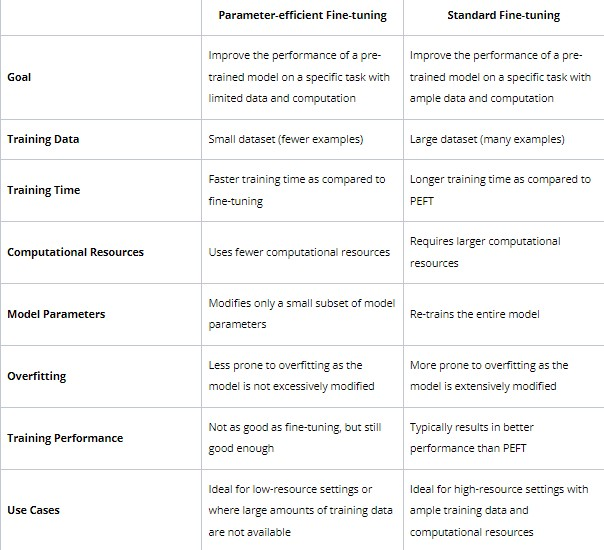

In [ ]:
display_image('/content/finetuning.jpg')

#Parameter-efficient fine-tuning techniques

**Adapter**<br><br>

- Adapters are a special type of submodule that can be added to pre-trained language models to modify their hidden representation during fine-tuning. By inserting adapters after the multi-head attention and feed-forward layers in the transformer architecture, we can update only the parameters in the adapters during fine-tuning while keeping the rest of the model parameters frozen.

- Adopting adapters can be a straightforward process. All that is required is to add adapters into each transformer layer and place a classifier layer on top of the pre-trained model. By updating the parameters of the adapters and the classifier head, we can improve the performance of the pre-trained model on a particular task without updating the entire model. This approach can save time and computational resources while still producing impressive results.

**LoRA**<br><br>


- Low-Rank Adaptation (LoRA) of large language models is another approach in the area of fine-tuning models for specific tasks or domains. Similar to the adapters, LoRA is also a small trainable submodule that can be inserted into the transformer architecture. It involves freezing the pre-trained model weights and injecting trainable rank decomposition matrices into each layer of the transformer architecture, greatly diminishing the number of trainable parameters for downstream tasks. This method can minimize the number of trainable parameters by up to 10,000 times and the GPU memory necessity by 3 times while still performing on par or better than fine-tuning model quality on various tasks. LoRA also allows for more efficient task-switching, lowering the hardware barrier to entry, and has no additional inference latency compared to other methods.

#Fine-tune Llama 3 with ORPO

ORPO is a new exciting fine-tuning technique that combines the traditional supervised fine-tuning and preference alignment stages into a single process. This reduces the computational resources and time required for training. Moreover, empirical results demonstrate that ORPO outperforms other alignment methods on various model sizes and benchmarks.

- There are now many methods to align large language models (LLMs) with human preferences. Reinforcement learning with human feedback (RLHF) was one of the first and brought us ChatGPT, but RLHF is very costly. DPO**(Differentiable Preference Optimization)**, IPO**(Interactive Preference Optimization)**, and KTO **(Knowledge Transfer Optimization)** are notably cheaper than RLHF as they don’t need a reward model.<br><br>

- While DPO and IPO are cheaper, they still require to train two different models. One model for the supervised fine-tuning (SFT) step, i.e., training the model to answer instructions, and then the model to align with human preferences using the SFT model for initialization and as a reference.<br><br>

- ORPO is yet another new method for LLM alignment but this one doesn’t even need the SFT model. With ORPO, the LLM jointly learns to answer instructions and human preferences.

[ORPO: Monolithic Preference Optimization without Reference Model](https://arxiv.org/abs/2403.07691)

#ORPO

Instruction tuning and preference alignment are essential techniques for adapting Large Language Models (LLMs) to specific tasks. Traditionally, this involves a multi-stage process: 1/ Supervised Fine-Tuning (SFT) on instructions to adapt the model to the target domain, followed by 2/ preference alignment methods like Reinforcement Learning with Human Feedback (RLHF) or Direct Preference Optimization (DPO) to increase the likelihood of generating preferred responses over rejected ones.

In [ ]:
display_image('/content/ftrth4Q.png')

However, researchers have identified a limitation in this approach. While SFT effectively adapts the model to the desired domain, it inadvertently increases the probability of generating undesirable answers alongside preferred ones. This is why the preference alignment stage is necessary to widen the gap between the likelihoods of preferred and rejected outputs.

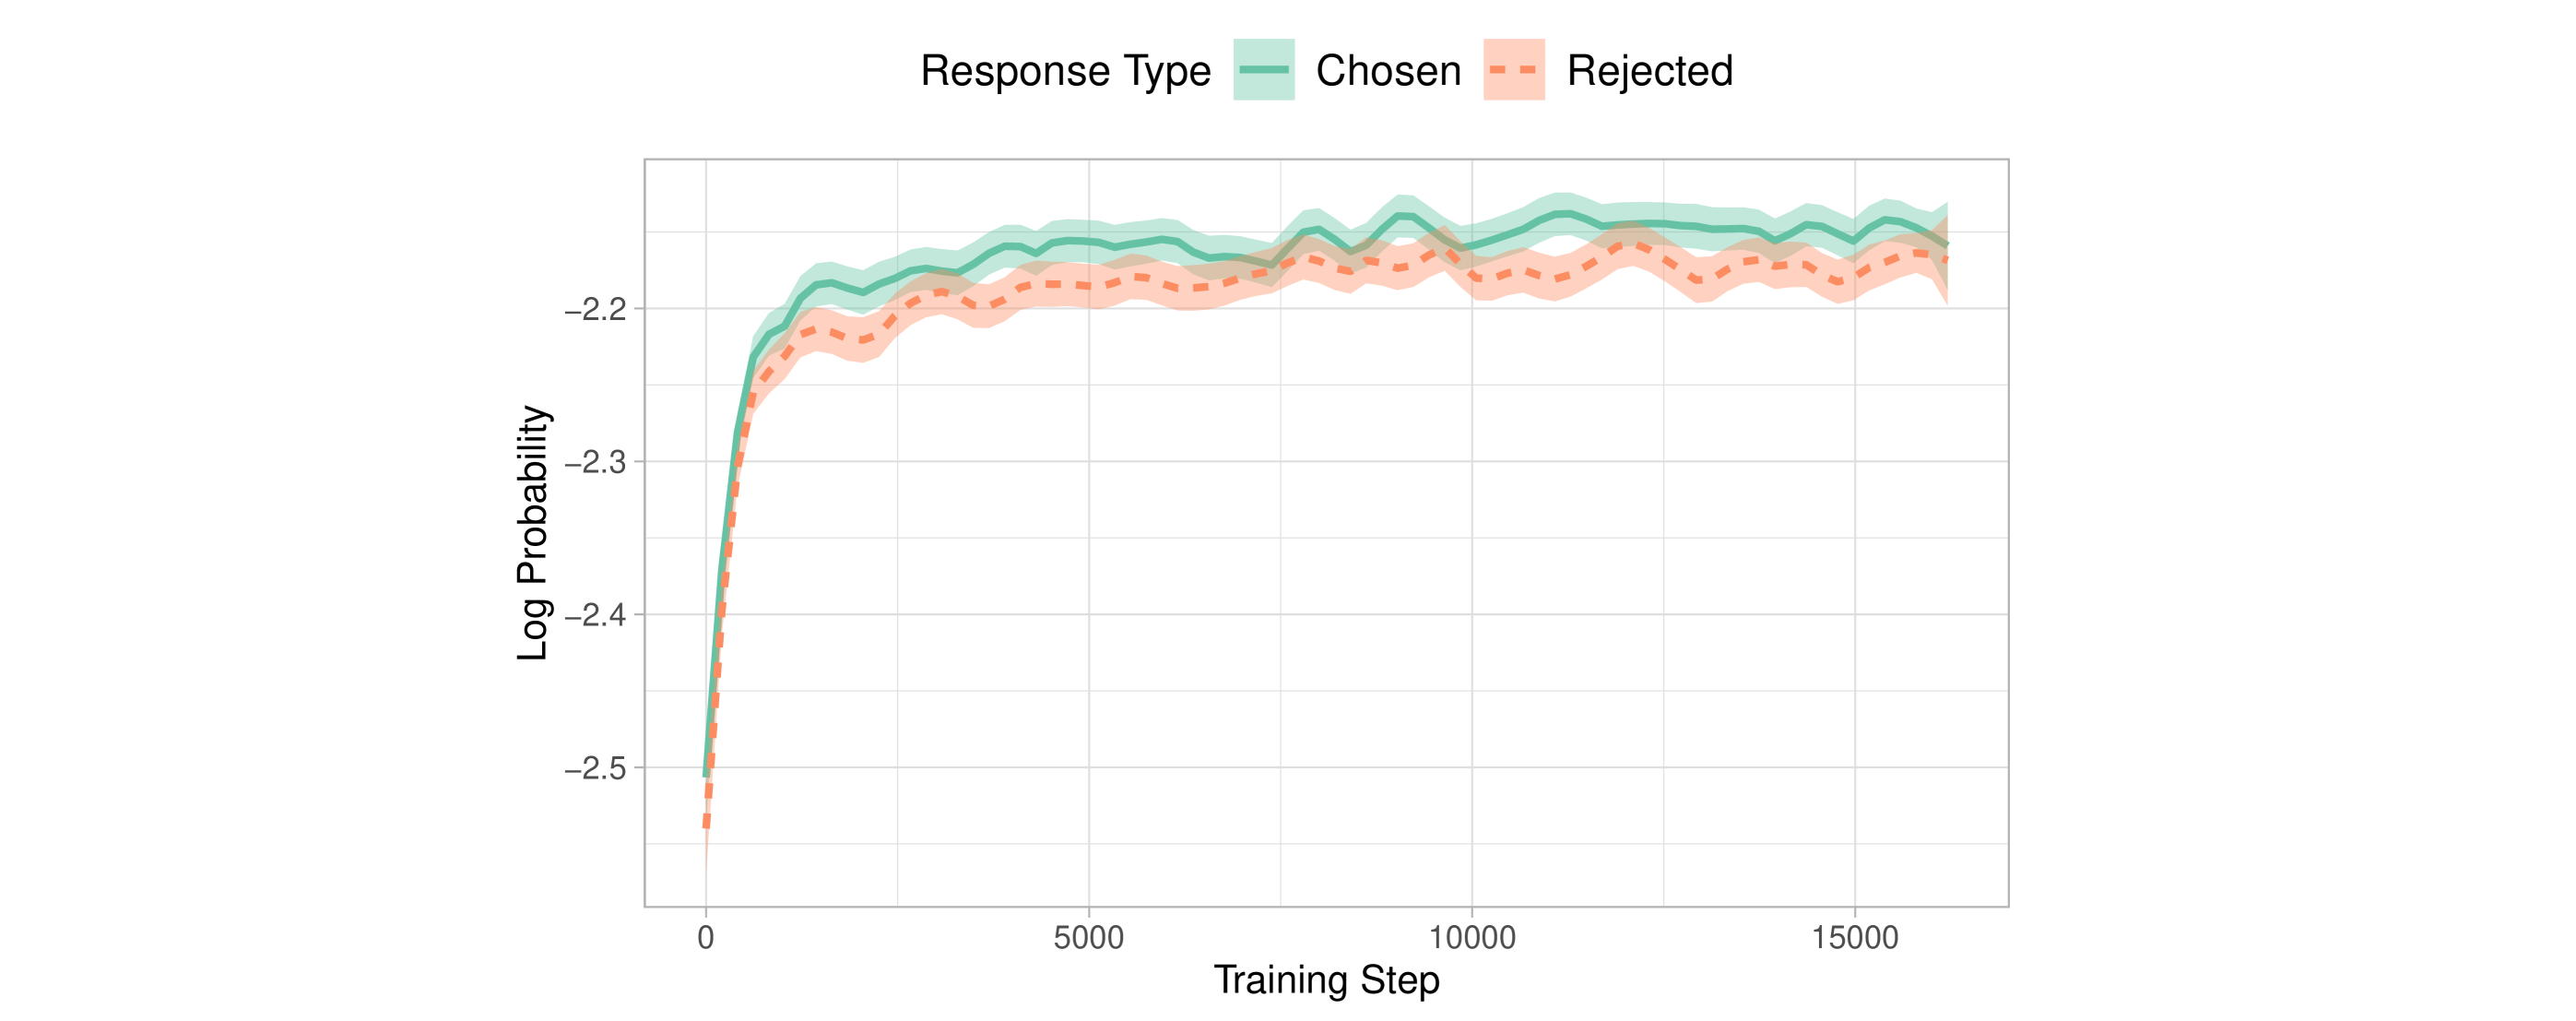

In [ ]:
display_image('/content/zWnTNlH.png')

Introduced by Hong and Lee (2024), ORPO offers an elegant solution to this problem by combining instruction tuning and preference alignment into a single, monolithic training process.

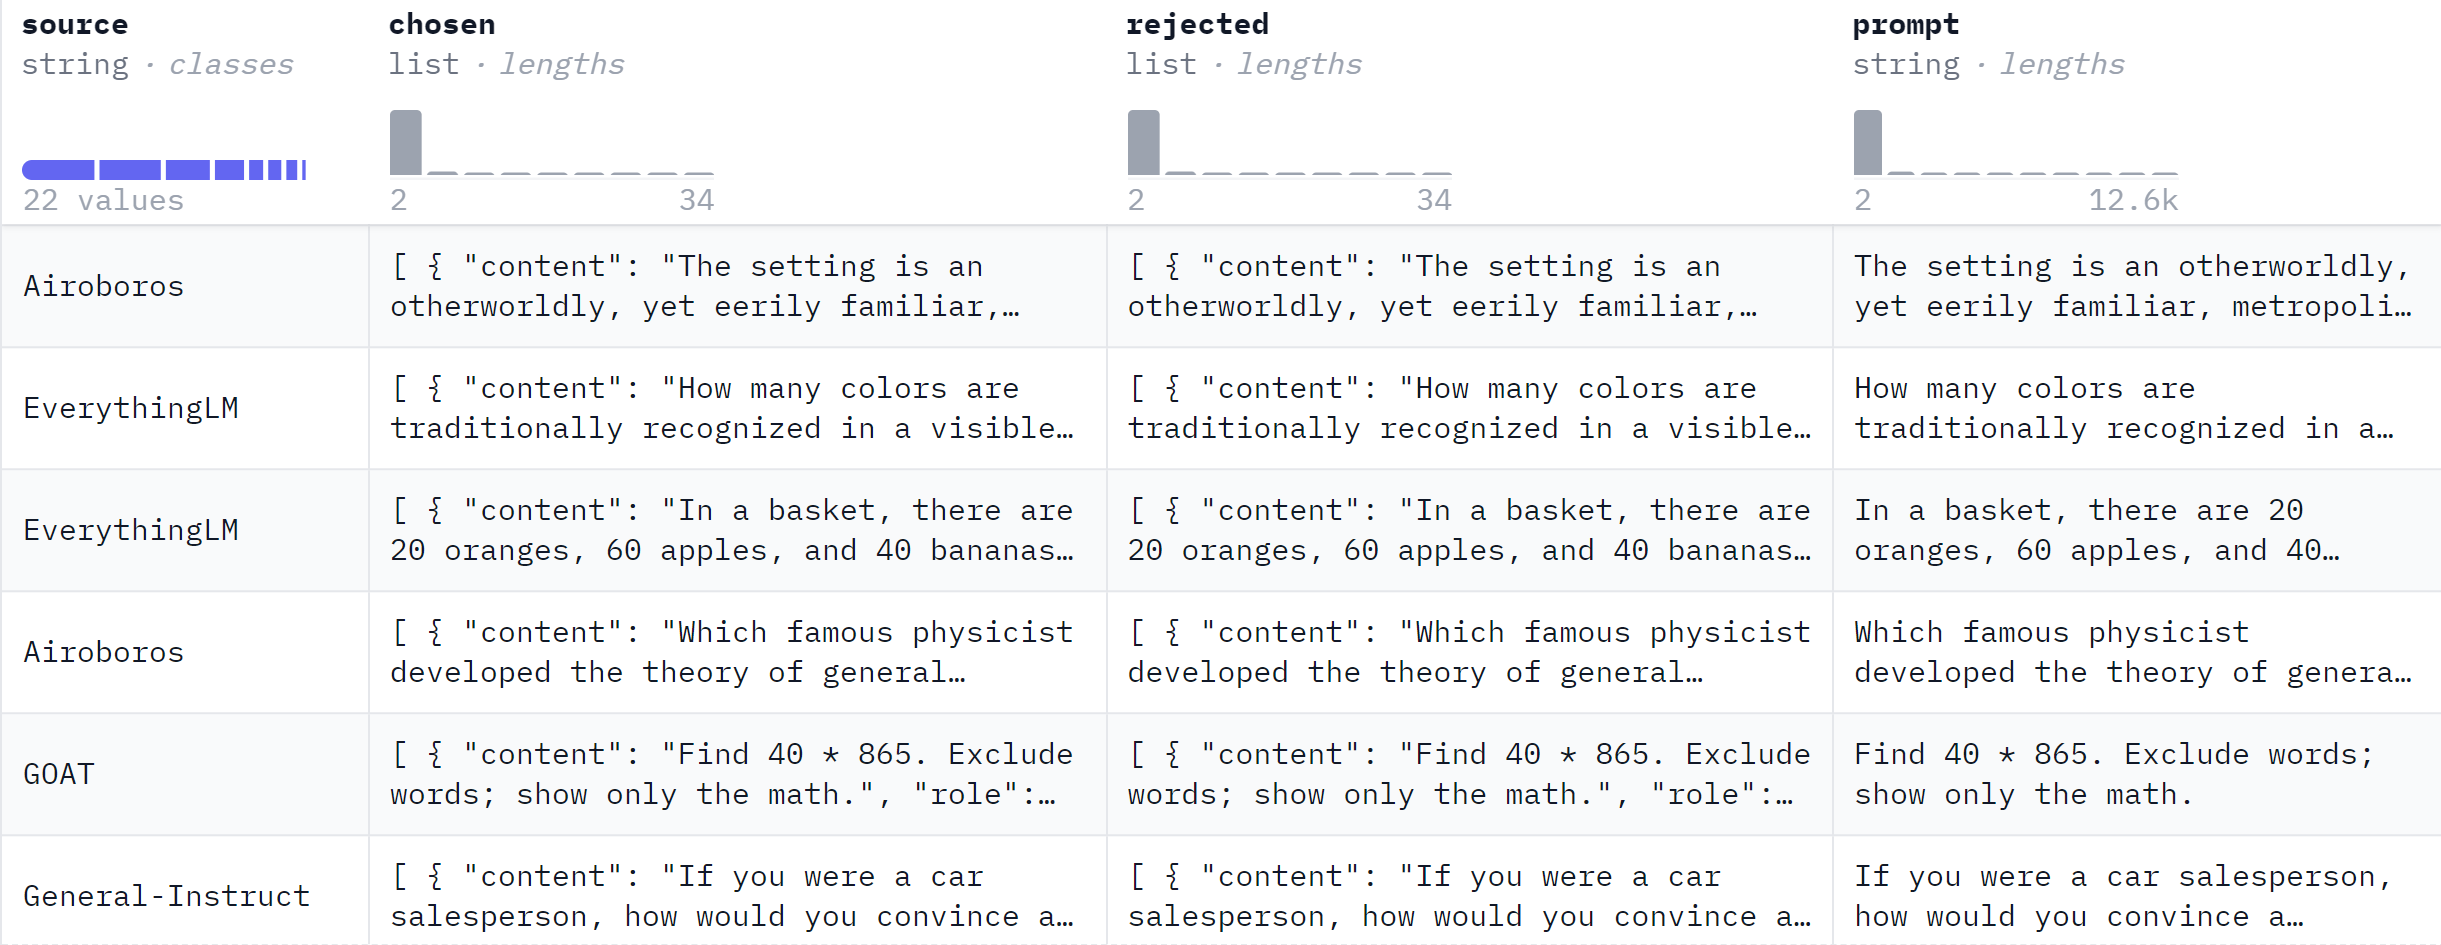

In [ ]:
display_image('/content/IFeK7DO.png')

In [ ]:
!pip install -U transformers datasets accelerate peft trl bitsandbytes wandb


#**Accelerate**



Accelerate is a library that provides a set of tools to accelerate the training of deep learning models. It's designed to work seamlessly with popular deep learning frameworks like PyTorch and TensorFlow.

Accelerate provides several features to speed up training, including:

**Mixed precision training:**

- Accelerate allows you to use lower precision data types (e.g., float16) for model weights and activations, which can significantly reduce memory usage and improve training speed.<br><br>


**Gradient checkpointing:**

- Accelerate provides a gradient checkpointing mechanism that allows you to store only the gradients of the model's parameters at certain intervals, reducing memory usage and improving training speed.<br><br>


**Distributed training:**

- Accelerate provides a distributed training framework that allows you to scale your training process across multiple machines, making it ideal for large-scale deep learning models

#**Wandb:**<br><br>

- The Weights & Biases library (wandb) is a tool for visualizing and tracking machine learning experiments. It provides features for logging model training metrics, visualizing training progress with interactive charts, and comparing experiments across different runs. It's commonly used by researchers and practitioners to monitor and analyze the performance of their machine learning models.

#**TRL - Transformer Reinforcement Learning**

- TRL is a full stack library where we provide a set of tools to train transformer language models with Reinforcement Learning, from the Supervised Fine-tuning step (SFT), Reward Modeling step (RM) to the Proximal Policy Optimization (PPO) step. <br><br>



**Model Classes:**

A brief overview of what each public model class does.<br><br>


**SFTTrainer:**

Supervise Fine-tune your model easily with SFTTrainer<br><br>


**RewardTrainer:**

Train easily your reward model using RewardTrainer.<br><br>


**PPOTrainer:**

Further fine-tune the supervised fine-tuned model using PPO algorithm
Best-of-N Sampling: Use best of n sampling as an alternative way to sample predictions from your active model<br><br>


**DPOTrainer:**


Direct Preference Optimization training using DPOTrainer.
TextEnvironment: Text environment to train your model using tools with RL.

#**BitsAndBytes**

**Optimizers:**<br><br>


- Optimizers are algorithms used to adjust the parameters of a machine learning model during training in order to minimize the error or loss function. These algorithms play a crucial role in the training process by determining how the model's parameters are updated based on the gradients of the loss function with respect to those parameters.<br><br>

- Common optimization algorithms include stochastic gradient descent (SGD), Adam, RMSprop, and Adagrad, among others. Each optimizer has its own update rules and hyperparameters that influence the training dynamics and convergence properties of the model.<br><br>


Example:

Suppose you're training a neural network for image classification. During each training iteration, the optimizer computes the gradients of the loss function with respect to the model's parameters and updates the parameters accordingly to minimize the classification error.

**Precision:**<br><br>


- Precision refers to the level of numerical accuracy or representation used to store and process data in a computational system. In the context of machine learning and optimization, precision often refers to the number of bits used to represent numerical values, particularly floating-point numbers.<br><br>

- Higher precision allows for greater numerical accuracy but requires more memory and computational resources. Conversely, lower precision reduces memory usage and computational overhead but may introduce quantization errors or numerical instability.<br><br>


- Precision is commonly expressed in terms of the number of bits used to represent numerical values, such as 16-bit (half precision), 32-bit (single precision), or 64-bit (double precision).<br><br>


Example:

In training neural networks, the weights, biases, and gradients are typically represented using 32-bit floating-point numbers (float32) for high precision. However, for memory-constrained environments or specialized hardware accelerators, lower precision formats like 16-bit floating-point numbers (float16) or even 8-bit integers (int8) may be used to reduce memory consumption and improve computational efficiency while still achieving acceptable performance.

#**BitsAndBytes**

- The bitsandbytes library provides functionalities for reducing memory consumption in large language models (LLMs) using k-bit quantization techniques. <br><br>

Let's break down each feature and explain them with examples:<br><br>

**8-bit Optimizers:**<br><br>


- This feature utilizes block-wise quantization to maintain 32-bit performance while significantly reducing memory consumption. It optimizes the memory usage of the optimizer during training.


Example:

Suppose you're training a large language model using PyTorch with a 32-bit optimizer. By using bitsandbytes's 8-bit optimizer feature, you can quantize the optimizer to use only 8 bits for certain operations, dramatically reducing memory usage without sacrificing performance.<br><br>


**LLM.Int() or 8-bit Quantization for Inference:**<br><br>


- This feature enables large language model inference with only half the required memory and without any performance degradation. It achieves this by quantizing most features to 8 bits and separately treating outliers with 16-bit matrix multiplication.

Example:

You have a pre-trained language model like BERT, which requires significant memory for inference due to its large size. By applying bitsandbytes's LLM.Int() feature, you can quantize the model's parameters to 8 bits, reducing the memory required for inference while maintaining performance.<br><br>


**QLoRA or 4-bit Quantization for Training:**<br><br>


- This feature enables large language model training with memory-saving techniques that do not compromise performance. It quantizes the model to 4 bits and inserts a small set of trainable low-rank adaptation (LoRA) weights to allow training.


Example:

You want to fine-tune a large language model on a specific task, but memory constraints make it challenging. By using bitsandbytes's QLoRA feature, you can quantize the model to 4 bits and introduce LoRA weights, reducing memory usage during training without sacrificing performance.

In [ ]:
import gc
import os

import torch
import wandb
from datasets import load_dataset
from google.colab import userdata
from peft import LoraConfig, PeftModel, prepare_model_for_kbit_training
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    pipeline,
)
from trl import ORPOConfig, ORPOTrainer, setup_chat_format

wb_token = userdata.get('wandb')
wandb.login(key=wb_token)


In [ ]:
if torch.cuda.get_device_capability()[0] >= 8:
    !pip install -qqq flash-attn
    attn_implementation = "flash_attention_2"
    torch_dtype = torch.bfloat16
else:
    attn_implementation = "eager"
    torch_dtype = torch.float16


- The condition torch.cuda.get_device_capability()[0] >= 8 checks if the CUDA compute capability of the GPU is greater than or equal to 8.<br><br>

- CUDA capability 8 refers to GPUs with the Ampere architecture, which introduced significant improvements in performance, efficiency, and feature support compared to previous architectures.

- **torch.float16** represents 16-bit floating-point numbers (half precision), which offer lower precision but require less memory compared to 32-bit floating-point numbers (float32).<br><br>


- **torch.bfloat16** represents 16-bit floating-point numbers using the bfloat16 format, which provides greater precision than float16 for certain operations while still offering memory savings compared to float32.

In the following, we will load the Llama 3 8B model in 4-bit precision thanks to bitsandbytes. We then set the LoRA configuration using PEFT for QLoRA. I'm also using the convenient setup_chat_format() function to modify the model and tokenizer for ChatML support. It automatically applies this chat template, adds special tokens, and resizes the model's embedding layer to match the new vocabulary size.

In [ ]:
# Model
base_model = "meta-llama/Meta-Llama-3-8B"
new_model = "OrpoLlama-3-8B"

# QLoRA config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch_dtype,
    bnb_4bit_use_double_quant=True,
)

# LoRA config
peft_config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=['up_proj', 'down_proj', 'gate_proj', 'k_proj', 'q_proj', 'v_proj', 'o_proj']
)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(base_model)

# Load model
model = AutoModelForCausalLM.from_pretrained(
    base_model,
    quantization_config=bnb_config,
    device_map="auto",
    attn_implementation=attn_implementation
)
model, tokenizer = setup_chat_format(model, tokenizer)
model = prepare_model_for_kbit_training(model)


[Link to understand Quantization](https://www.kaggle.com/code/lorentzyeung/what-s-4-bit-quantization-how-does-it-help-llama2)

**bnb_4bit_quant_type:**

- NF4 (NormalFloat) is a 4-bit data type used in machine learning, which normalizes each weight to a value between -1 and 1 for a more accurate representation of the lower precision weight. It is an enhancement of the Quantile Quantization technique and has shown better results than both 4-bit Integers and 4-bit Floats. NF4 can also be coupled with Double-Quantization (DQ) for higher compression while maintaining performance.<br><br>

**bnb_4bit_use_double_quant**


- DQ encompasses two quantization phases; initially, quantization constants are processed, which are then used as inputs for the subsequent quantization, yielding FP32 and FP8 values. This method avoids any performance drop, while saving an average of about 0.37 bits per parameter (approximately 3 GB for a 65B model). The recent integration of bitsandbytes, which incorporates findings from the QLoRA paper (including NF4 and DQ), shows virtually no reduction in performance with 4-bit quantization for both inferring and training large language models. NF4 and Double Quantization can be leveraged using the bitsandbytes library which is integrated inside the transformers library. Here is an example of how to easily load and quantize any Hugging Face model using the bitsandbytes library:

**bnb_4bit_compute_dtype:**<br><br>

- This parameter specifies the data type to be used for computation during training or inference with 4-bit quantized parameters. It is set based on the conditional logic in the previous code snippet, where torch_dtype is determined.
In the provided example, torch_dtype could be either torch.bfloat16 or torch.float16, depending on the CUDA device capability.

The LoraConfig class is used to configure the LoRa (Layer-wise Relevance Analysis) technique for fine-tuning large language models. <br><br>

The parameters in the peft_config object are as follows:<br><br>


**r:**

- The r parameter specifies the rank of the LoRA projection matrix. This parameter controls the number of parameters used for fine-tuning. A higher rank leads to more parameters and potentially better performance, but it also increases the memory footprint of the model<br><br>


**lora_alpha:**

- The lora_alpha parameter controls the scale of the LoRA projection matrix.
You can use this parameter to adjust the learning rate for the fine-tuning process. For optimal results, set it to double the value of r.<br><br>


**lora_dropout:**

-  The lora_dropout parameter specifies the dropout rate for the LoRA projection matrix.
This parameter can help prevent overfitting and enhance the model’s generalization ability.<br><br>


**bias:**

- The bias parameter specifies whether to use a bias term in the LoRA projection matrix. Setting this to “none” implies that no bias term will be used.<br><br>


**task_type:**

- The task_type parameter specifies the type of task the model will be used for. In this case, the task type is set to “CAUSAL_LM”, indicating that the model will be used for causal language modeling.<br><br>

**target_modules:**

-  The list of modules in the model to apply the LoRa technique to. This parameter specifies the modules where the adapter matrices will be added.

In [ ]:
dataset_name = "mlabonne/orpo-dpo-mix-40k"
dataset = load_dataset(dataset_name, split="all")
dataset = dataset.shuffle(seed=42).select(range(10))

def format_chat_template(row):
    row["chosen"] = tokenizer.apply_chat_template(row["chosen"], tokenize=False)
    row["rejected"] = tokenizer.apply_chat_template(row["rejected"], tokenize=False)
    return row

dataset = dataset.map(
    format_chat_template,
    num_proc= os.cpu_count(),
)
dataset = dataset.train_test_split(test_size=0.01)


In [ ]:
orpo_args = ORPOConfig(
    learning_rate=8e-6,
    beta=0.1,
    lr_scheduler_type="linear",
    max_length=1024,
    max_prompt_length=512,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=4,
    optim="paged_adamw_8bit",
    num_train_epochs=1,
    evaluation_strategy="steps",
    eval_steps=0.2,
    logging_steps=1,
    warmup_steps=10,
    report_to="wandb",
    output_dir="./results/",
)

trainer = ORPOTrainer(
    model=model,
    args=orpo_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    peft_config=peft_config,
    tokenizer=tokenizer,
)
trainer.train()
trainer.save_model(new_model)
